In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

This is a Python notebook for Pokémon VGC data analysis written by Simone Caletti (aka Manabu) and this is part of the Beldum project.

You can use this notebook to extract informations related to a VGC competition from a bunch of ETTs.

Upload a CSV database:

In [3]:
if os.path.exists("db.csv"):
  !rm db.csv
  
from google.colab import files
uploaded = files.upload()

df = pd.read_csv(r'db.csv')
#print(df)

Saving db.csv to db.csv


#USAGE ANALYSIS

In the plot here below we represented the "usage". All the Pokemons in the ETTs are considered, even if they appeared only once. 

Remove the hashtag to de-comment the last two lines of code. Doing this, when you run the cell the code will save automatically the plot locally on you pc.

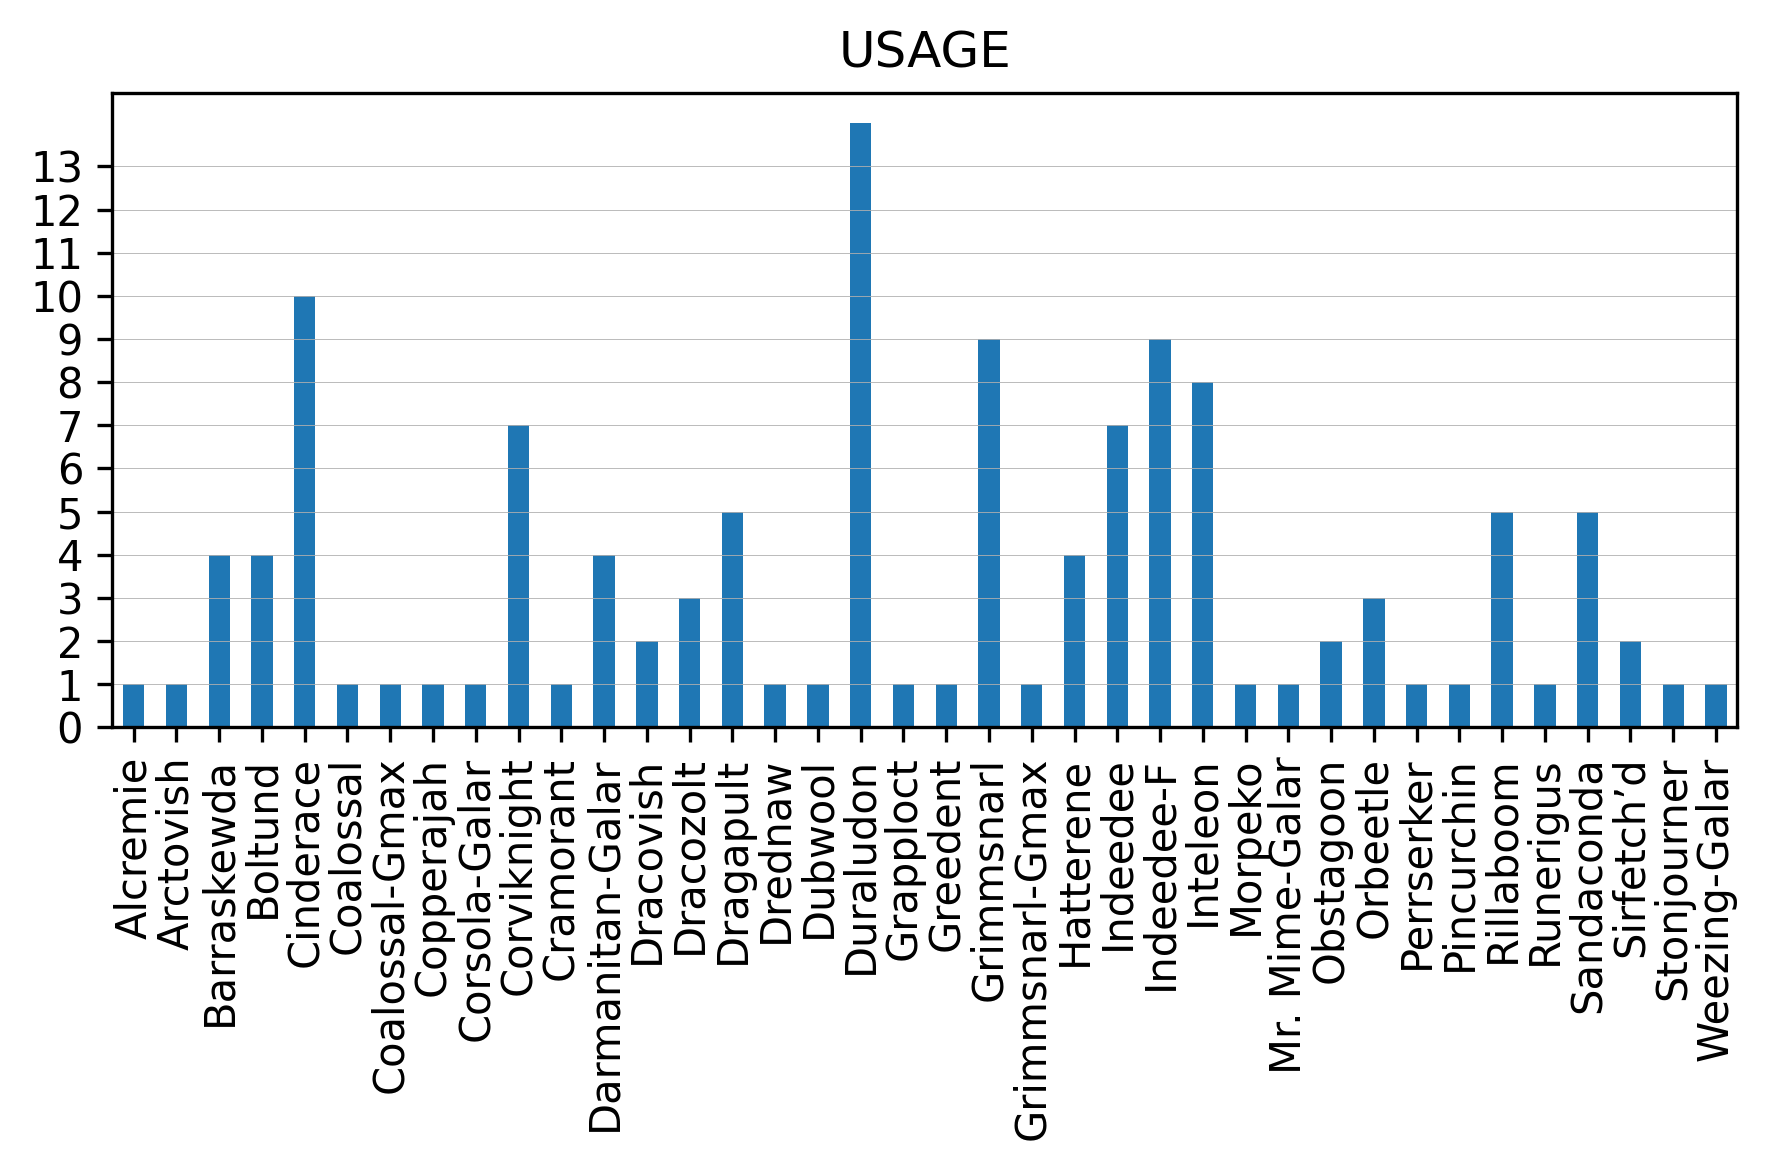

In [9]:
max = np.array(df.groupby("specie").size()).max()
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', dpi=300)
usage = df.groupby("specie").size().plot(kind="bar", ax=ax).get_figure()
ax.grid(axis="y", linewidth=0.2)
ax.set_yticks(range(max))
ax.set_xlabel("")
ax.set_title("USAGE")
plt.tight_layout()
#usage.savefig("usage.png")
#files.download("usage.png")

In the plot here below we have considere only the "top usage". Tune the N parameter to modify the top as you wish.

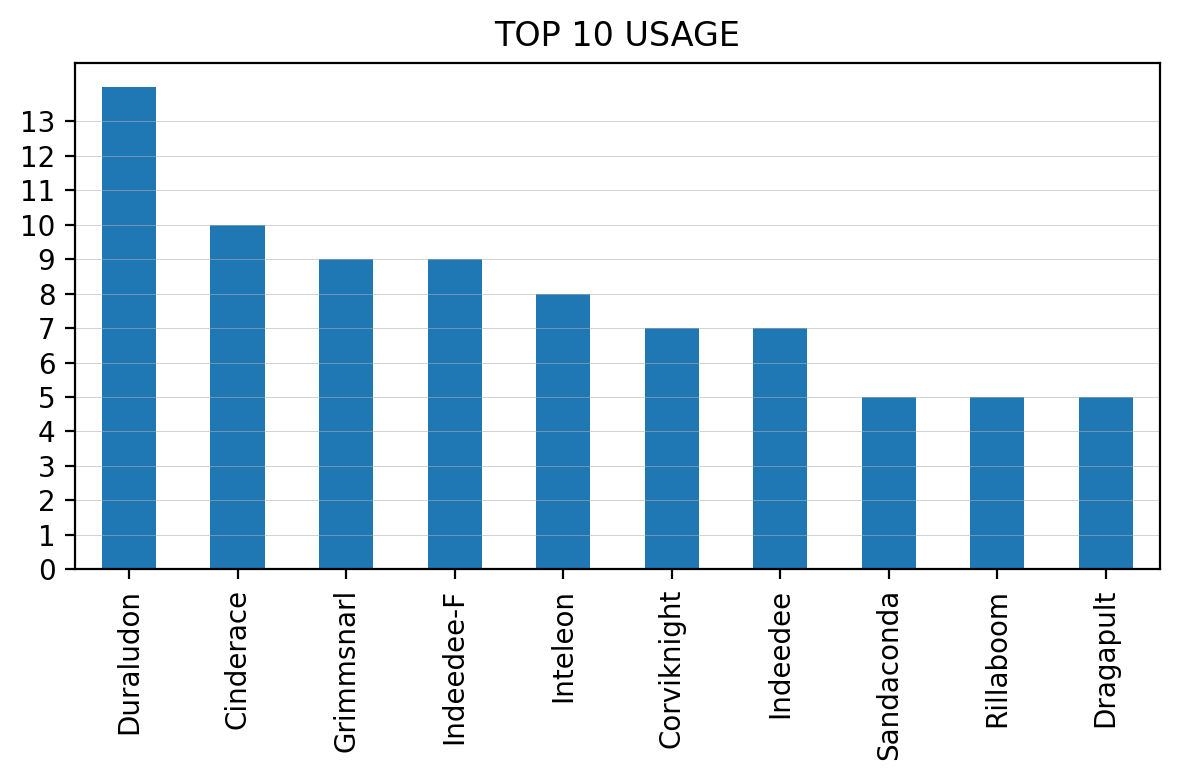

In [8]:
N = 10

max = np.array(df.groupby("specie").size()).max()
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', dpi=200)
usage = df["specie"].value_counts().head(N).plot(kind="bar", ax=ax).get_figure()
ax.grid(axis="y", linewidth=0.2)
ax.set_yticks(range(max + 1))
ax.set_xlabel("")
ax.set_title("TOP 10 USAGE")#
plt.tight_layout()
#usage.savefig("top_usage.png")
#files.download("top_usage.png")

#TOP CORE ANALYSIS


Code here counts how many times a Pokemon is in the same team with another one. This couple is what we mention here as a "core".

In [4]:
cores1 = pd.Series(list(zip(df.specie, df.teammate1)))
cores2 = pd.Series(list(zip(df.specie, df.teammate2)))
cores3 = pd.Series(list(zip(df.specie, df.teammate3)))
cores4 = pd.Series(list(zip(df.specie, df.teammate4)))
cores5 = pd.Series(list(zip(df.specie, df.teammate5)))
df_core1 = cores1.value_counts().rename_axis("core").reset_index(name="counts")
df_core2 = cores2.value_counts().rename_axis("core").reset_index(name="counts")
df_core3 = cores3.value_counts().rename_axis("core").reset_index(name="counts")
df_core4 = cores4.value_counts().rename_axis("core").reset_index(name="counts")
df_core5 = cores5.value_counts().rename_axis("core").reset_index(name="counts")

dfs = [df_core1, df_core2, df_core3, df_core4, df_core5]
core_list = []
count_list = []
for df_core in dfs:
  for core, counts in zip(df_core.core, df_core.counts):
    eq_core = (core[1], core[0])
    if core in core_list:
      count_list[core_list.index(core)] += counts
    elif eq_core in core_list:
      count_list[core_list.index(eq_core)] += counts
    else:
      core_list.append(core)
      count_list.append(counts)
count_list = [int(x/2) for x  in count_list]
      
df_core = pd.DataFrame({"core" : core_list, "counts" : count_list}).sort_values(by="counts", ascending=False)
print(df_core)

                                core  counts
4             (Duraludon, Cinderace)       8
10           (Grimmsnarl, Duraludon)       7
1              (Duraludon, Inteleon)       7
52           (Indeedee-F, Duraludon)       7
2              (Cinderace, Inteleon)       6
..                               ...     ...
93   (Darmanitan-Galar, Barraskewda)       1
28       (Pincurchin, Corsola-Galar)       1
91        (Grapploct, Corsola-Galar)       1
90            (Sandaconda, Inteleon)       1
188            (Greedent, Dracovish)       1

[189 rows x 2 columns]


Here below the plot with N most popular cores. The user can tune N in the code below to change how many cores will be plotted.

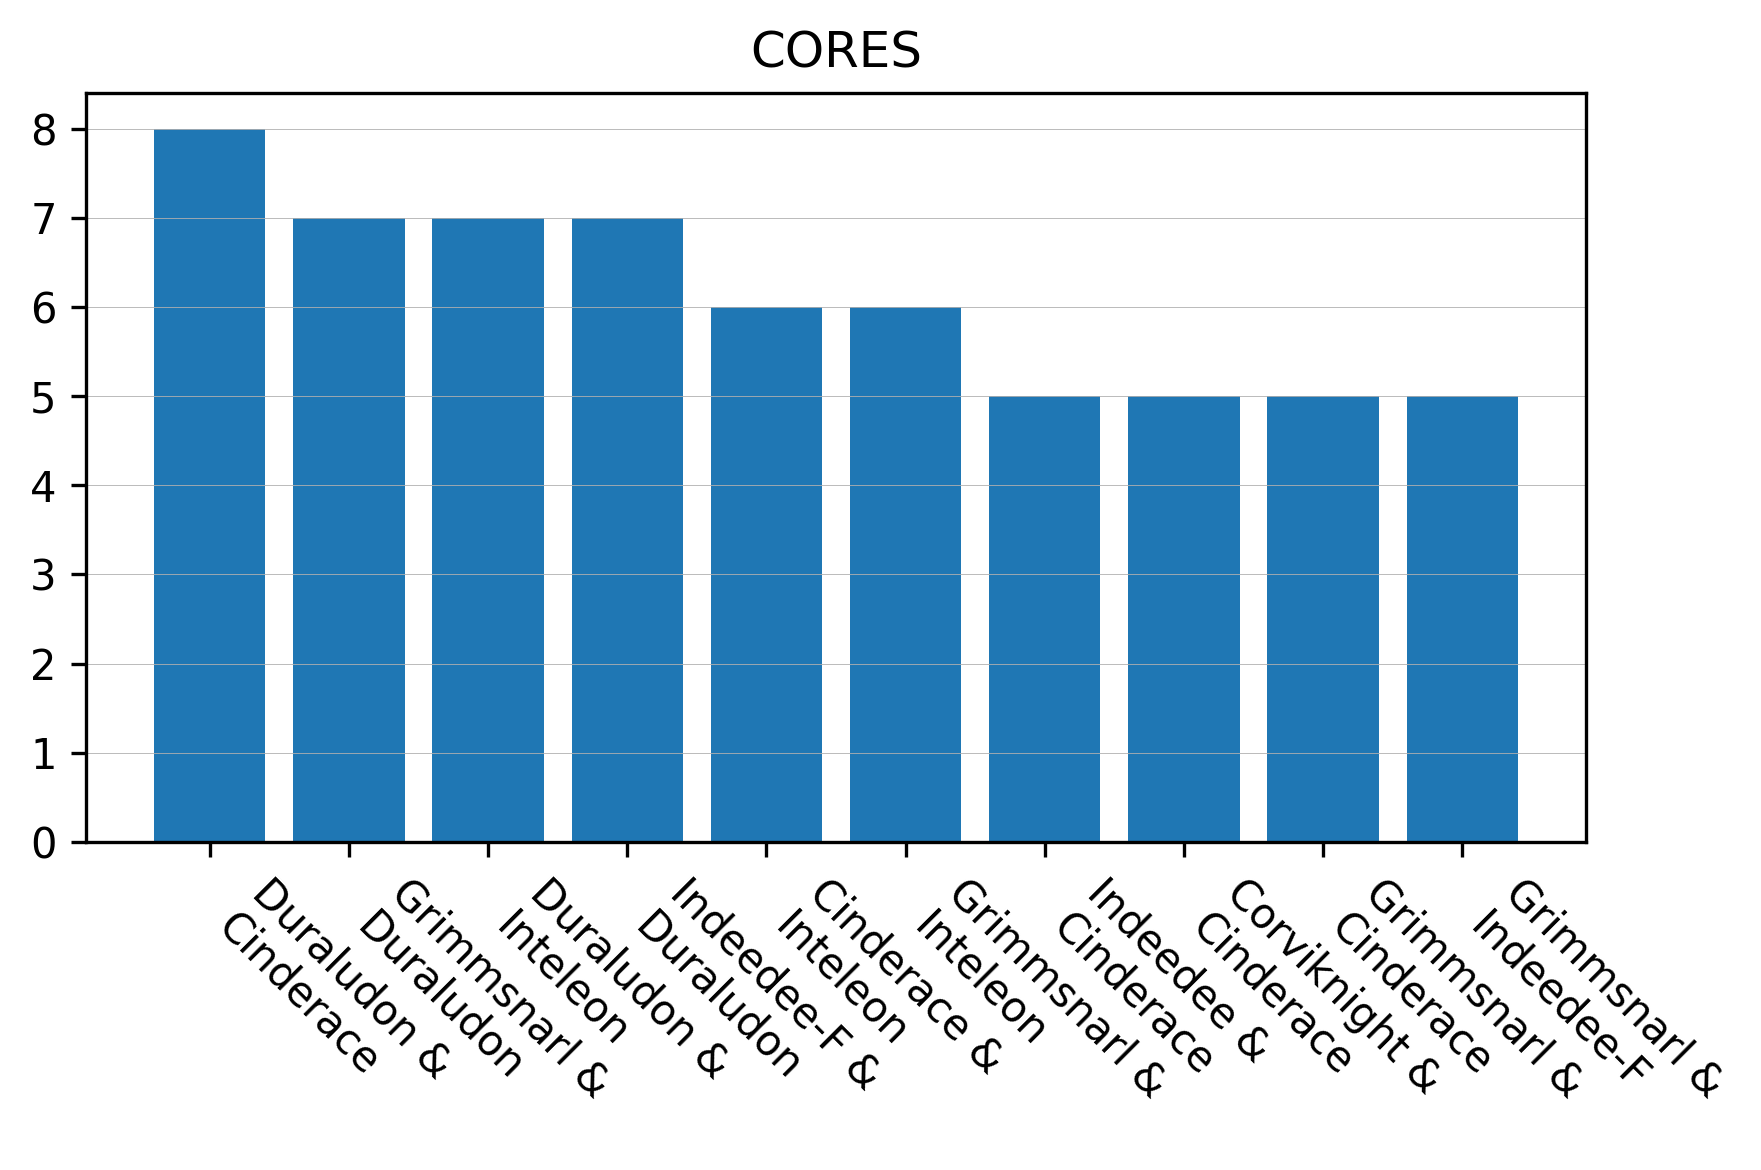

In [7]:
N = 10

xlist = df_core.head(N).core.to_list()
xlist = [str(x[0]) + " &\n" + str(x[1]) for x in xlist]
ylist = df_core.head(N).counts.to_list()
max = df_core.counts.max()

fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', dpi=300)
ax.bar(xlist, ylist)
ax.grid(axis="y", linewidth=0.2)
ax.set_yticks(range(max + 1))
ax.set_xlabel("")
ax.set_title("CORES")
plt.xticks(rotation=-45, ha="left")
plt.tight_layout()
#usage.savefig("core.png")
#files.download("core.png")

#SPECIFIC SET

Here below we study a specific Pokémon of interest. All the different sets are described in the table here below.

Specify the Pokèmon you want to study changing the "pkm" parameter.

In [50]:
pkm = "Duraludon"

df.groupby("specie").get_group(pkm)

,specie,obj,ability,HP,Atk,Def,SpA,SpD,Spe,nature,iv_HP,iv_Atk,iv_Def,iv_SpA,iv_SpD,iv_Spe,move1,move2,move3,move4,teammate1,teammate2,teammate3,teammate4,teammate5
11,Duraludon,Weakness Policy,Stalwart,0,0,0,252,4,252,Timid,31,0,31,31,31,31,Draco Meteor,Flash Cannon,Dark Pulse,Thunder,Dragapult,Barraskewda,Indeedee-F,Weezing-Galar,Darmanitan-Galar
13,Duraludon,Assault Vest,Stalwart,0,0,252,252,4,0,Quiet,31,0,31,31,31,0,Draco Meteor,Flash Cannon,Thunderbolt,Dark Pulse,Rillaboom,Hatterene,Copperajah,Dracozolt,Orbeetle
23,Duraludon,Shuca Berry,Stalwart,0,0,252,252,4,0,Quiet,31,0,31,31,31,0,Flash Cannon,Draco Meteor,Dark Pulse,Thunderbolt,Coalossal-Gmax,Obstagoon,Indeedee-F,Cinderace,Hatterene
26,Duraludon,Assault Vest,Stalwart,100,0,76,252,20,60,Modest,31,0,31,31,31,31,Snarl,Thunderbolt,Draco Meteor,Flash Cannon,Dracozolt,Inteleon,Sandaconda,Indeedee-F,Grimmsnarl
35,Duraludon,Assault Vest,Stalwart,156,0,4,212,68,68,Modest,31,0,31,31,31,31,Flash Cannon,Draco Meteor,Thunderbolt,Dark Pulse,Cinderace,Inteleon,Boltund,Indeedee,Darmanitan-Galar
39,Duraludon,Life Orb,Stalwart,252,0,0,252,0,4,Modest,31,0,31,31,31,31,Flash Cannon,Draco Meteor,Dark Pulse,Protect,Corviknight,Dracovish,Runerigus,Grimmsnarl,Inteleon
45,Duraludon,Assault Vest,Stalwart,116,0,4,252,100,36,Modest,31,0,31,31,31,31,Flash Cannon,Draco Meteor,Thunderbolt,Snarl,Indeedee,Cinderace,Boltund,Grimmsnarl,Corviknight
76,Duraludon,Assault Vest,Stalwart,4,0,252,252,0,0,Modest,31,0,31,31,31,31,Draco Meteor,Thunderbolt,Flash Cannon,Body Press,Inteleon,Indeedee-F,Darmanitan-Galar,Grimmsnarl,Cinderace
87,Duraludon,Choice Specs,Stalwart,4,0,0,252,0,252,Modest,31,0,31,31,31,31,Flash Cannon,Draco Meteor,Dark Pulse,Thunderbolt,Cramorant,Arctovish,Sirfetch’d,Sandaconda,Orbeetle
90,Duraludon,Assault Vest,Stalwart,124,0,4,236,12,132,Modest,31,10,31,31,31,31,Flash Cannon,Draco Meteor,Thunderbolt,Snarl,Inteleon,Grimmsnarl,Cinderace,Indeedee,Corviknight


In [72]:
attribs = ["obj", "ability", "nature"]
attribs_label = ["Object", "Ability", "Nature"]

df_obj = df.groupby("specie").get_group(pkm)[attribs[0]].value_counts().rename_axis(attribs[0]).reset_index(name="counts")
den = df_obj.counts.sum()
perc = round((df_obj.counts / den) * 100, 1)
pd.DataFrame({attribs_label[0] : df_obj[attribs[0]], "Percentage (%)" : perc})

,Object,Percentage (%)
0,Assault Vest,64.3
1,Life Orb,14.3
2,Shuca Berry,7.1
3,Choice Specs,7.1
4,Weakness Policy,7.1


In [73]:
attribs = ["obj", "ability", "nature"]
attribs_label = ["Object", "Ability", "Nature"]

df_obj = df.groupby("specie").get_group(pkm)[attribs[1]].value_counts().rename_axis(attribs[1]).reset_index(name="counts")
den = df_obj.counts.sum()
perc = round((df_obj.counts / den) * 100, 1)
pd.DataFrame({attribs_label[1] : df_obj[attribs[1]], "Percentage (%)" : perc})

,Ability,Percentage (%)
0,Stalwart,100.0


In [74]:
attribs = ["obj", "ability", "nature"]
attribs_label = ["Object", "Ability", "Nature"]

df_obj = df.groupby("specie").get_group(pkm)[attribs[2]].value_counts().rename_axis(attribs[2]).reset_index(name="counts")
den = df_obj.counts.sum()
perc = round((df_obj.counts / den) * 100, 1)
pd.DataFrame({attribs_label[2] : df_obj[attribs[2]], "Percentage (%)" : perc})

,Nature,Percentage (%)
0,Modest,57.1
1,Quiet,21.4
2,Timid,21.4
